# Assignment 1

## EOSC 211

logistics, partner collaboration, due dates

LG's:

* manipulate datetime objects, timedeltas
* use dictionaries to access complex datasets
* recycle old code for new purposes (use the map from lab 3!)

### notes for andrew:

part 1: I can use if elif else, loops, numpy arrays, logical indexing, annotate, subplots, type casting

part 2: I can use f strings, maybe dictionaries, maybe functions

## Introduction

The ocean in the Salish Sea is affected by tidal forces,  wind, and spatial changes in density,  all of which drive currents.  What do these currents do?  If we release a floating object in the Strait of Georgia (the part of the Salish Sea right beside Vancouver), where will it end up?  Simple questions like turn out to be surprisingly difficult to answer. At present, we do know that there is an “estuarine” circulation in the Salish Sea.  Fresh water flows in from the Fraser River just south of Richmond.  This fresh water eventually ends up in the Pacific*.  So, there is a mean flow of surface water out of the Fraser, south past Victoria and then west out to the Pacific$^†$.  We also know that it takes a few weeks to get there, and so objects floating in the Strait probably also take about that long to leave our waters. But we would like to get a better idea of what the mean speed of their drift is, and how this mean might change from time to time. 

Over the past few years, the [ODL drifters project](www.drifters.eoas.ubc.ca) has been releasing GPS-tracked drifters into the Strait of Georgia near the mouth of the Fraser River, in order to better understand how the surface water flows out to the Pacific. In the assignment, you will analyze some of the data from this project.

---
\* If it didn’t, the whole area would eventually be full of fresh water only, but it isn’t

† We think that very little goes around the northern tip of Vancouver Island because there is only a narrow channel separating it from the mainland there

In [1]:
import numpy as np
from scipy.io import loadmat
from e211_lib import e211
from matplotlib import pyplot as plt

In [2]:
# There is a function in the library to convert the original .mat file to the new format
data = e211.clean_a1_data("Drifter_dataset.mat")

# or load the .npy file with
data = np.load("drifter_data.npy", allow_pickle=True)

## Part 1: Summary Plot

The `drifter_data.npy` file contains all of the data from 153 drifters. The `.npy` extension is a file format specific to numpy arrays. Each element of the array contains a *dictionary* with the following **key:value** pairs:


    "drifter_id":        <integer> a unique identifier (e.g., labelled # on drifter body) 
    "design":            <integer> drifter design code (1-6)
    "tzone":             <str> Time zone
    "datetime":          <datetime object> the dates associated with each reported lat/lon position
    "lons":              <float64> longitude in decimal degrees
    "lats":              <float64> latitude in decimal degrees
    "comment":           <str> metadata
    "at_sea":            <int> flag for each point, classifying it as:
                         1 - good - at sea, freely floating (valid)
                         2 - bad  - at sea but trapped in rocky intertidal
                                    (floating but not free)
                         3 - bad  - on land (grounded, test data, etc.)
                         4 - bad - at sea (large GPS error, on ship, etc.)
    "ends_on_land":      <boolean> if the drifter ends by grounding or not
                         True - grounded at or just after last at_sea==1 point
                         False - track ends at sea
    "found_on_land":     <boolean> If the drifter was found by a human (True) on land
                         or if it was never recovered (False)
    "launchdate":        <datetime object> the date the drifter was launched 
                         format = (Year, Month, Day, Hour, Minute, Second, Microsecond)
    "enddate":           <datetime object> the date the drifter went offline
    "lifetime":          <timedelta object> the length of the drifter's life
    "refloated":         <boolean> if the drifter went to at_sea != 1 and then resumed 
                         transmitting with at_sea == 1
    "first_ground_date": <datetime obj> date of first status code != 1. If the drifter 
                         never grounded, this is equal to "enddate"
    "first_lifetime":    <timedelta object> length of time passed between launch and first 
                         status code != 1


Note that since all the drifters have different lifetimes, the dataset associated with each drifter will be a different length. Keep this in mind when using loops and indexing to access data, as it may cause errors.

All 153 tracks start in the vicinity of Sand Heads, at the mouth of the Fraser River. These include tracks where the drifter never touches land and eventually dies at sea, and tracks where the drifter grounds. For times between `launchdate` and
`first_ground_date` (or `enddate` if the drifter doesn’t ground), points with `at_sea == 1` are valid points; if any
`at_sea != 1`  then the corresponding `datetime`,`lats` and `lons` points are not valid for various reasons. Sometimes
grounded drifters refloat after some time ashore and drift further, but we will ignore any data that were acquired
after a grounding.

### Your Task

First, write code to show all the drift tracks up until either the point of first grounding, or the end of the track if the drifter does not ground. The track lines should be coloured to indicate the location of the track endpoint:

• Tracks that exit the northern Strait (i.e. with end point west of 125.19◦W, north of 50.0◦N) should be green.


• Tracks that leave the southern Strait (roughly, with end points south of about 48.78◦N latitude, but note that
one track that completely leaves the Strait this way ends up north of this latitude and you should account for
this) should be red.

• Tracks that end within the Strait of Georgia should be light blue.

As well as showing all the tracks, you should also label the starting and end points:

• Label the track starting points with dark blue markers (these should all be near the mouth of the Fraser58
River).

• Label track end points at time of first grounding (if they ground) with green markers.

• Label track end points if the drifter never grounds with red markers.

You should use `if` statements and/or conditional sampling to determine into which category a given track belongs.
Finally, add to the plot a text line that states how many tracks fall into each category - something like

```
100 tracks ground
21 tracks leave the SoG to the south
2 tracks leave the SoG to the north
```

(or whatever the numbers are) To hand in Part 1, provide the code and the plot. It should look something like Figure 1 (with the added text). Note - READ THE REST OF THE ASSIGNMENT so you can see what you have to do for the next part while answering this part. Also, the Handy Tips at the end will be helpful.

#### Step 1: Acquire all the data 

Several possible avenues here...

In [3]:
drifters = np.load("drifter_data.npy", allow_pickle=True)
basemap_in = loadmat("BCcoastline.mat")

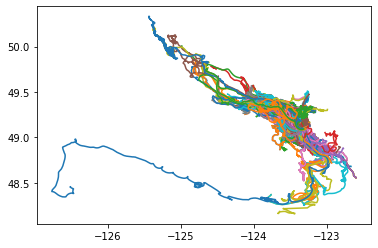

In [4]:
# plot the drifters
fig, ax = plt.subplots()
for dat in data:
    ax.plot(dat["lons"], dat["lats"])

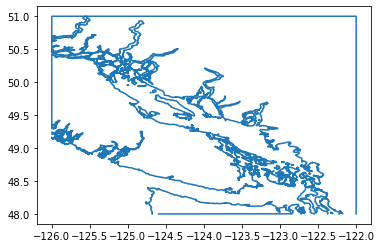

In [5]:
# the original basemap from matlab.. this is hard to parse with matplotlib
basemap = {"k":basemap_in["k"].flatten(),
           "lons":basemap_in["ncst"][:,0],
           "lats":basemap_in["ncst"][:,1]}

plt.plot(basemap["lons"], basemap["lats"]);

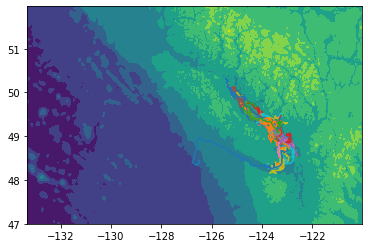

In [6]:
# recycle the basemap from lab 3! good teachable
# this is line for line the lab 3 tutorial section

raw_bathdata = e211.load_mat("Bathyfile.mat")
bathdata_fixed = raw_bathdata[::-1]

latlen = np.shape(bathdata_fixed)[0] # assign the height and width of the image to new variables
lonlen = np.shape(bathdata_fixed)[1]

lats = np.linspace(47, 60, latlen) # create arrays for lat and lon
lons = np.linspace(-150, -110, lonlen)

bath_zoomed = bathdata_fixed[0:150,500:900]
lats_zoomed = lats[0:150]
lons_zoomed = lons[500:900] # make sure the slices match between the coordinates and the original data

# plot the basemap and the drifters together (first pass)
plt.contourf(lons_zoomed, lats_zoomed, bath_zoomed)
for dr in drifters:
    plt.plot(dr["lons"], dr["lats"])

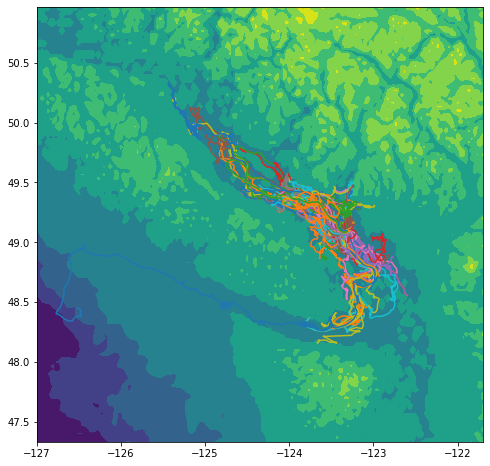

In [7]:
# readjust the map size to clearly show the drifters, and use conditional sampling
# to make our map only show land and sea rather than all elevetions -- less clutter
lats = np.linspace(47, 60, latlen)  # create arrays for lat and lon
lons = np.linspace(-150, -110, lonlen)

xmin = 690
xmax = 850

ymin = 10
ymax = 120

bath_zoomed = bathdata_fixed[ymin:ymax, xmin:xmax]
lats_zoomed = lats[ymin:ymax]
lons_zoomed = lons[xmin:xmax]

# recolor the map
#bath_zoomed[bath_zoomed <= 0] = -1000
#bath_zoomed[bath_zoomed > 50] = 1000

fig, ax = plt.subplots(figsize=(8,8))
plt.contourf(lons_zoomed, lats_zoomed, bath_zoomed) #, cmap="binary")
for dr in drifters:
    plt.plot(dr["lons"], dr["lats"])

good start, fix this later on

#### Step 2: Use conditional sampling

Use conditional sampling to trim the drifter tracks and choose colors according to the criteria specified above

In [8]:
# how to conditionally sample a dictionary for a single element
my_drifter = drifters[0]
print("before conditional sampling:")
print(len(my_drifter["lats"]))
print("after conditional sampling:")
print(len(my_drifter["lats"][my_drifter["datetime"] < my_drifter["first_ground_date"]]))

before conditional sampling:
562
after conditional sampling:
183


In [9]:
# show all the drift tracks up until either the point of first grounding, 
# or the end of the track if the drifter does not ground.
for dr in drifters:
    dr["lats"] = dr["lats"][dr["datetime"] < dr["first_ground_date"]]
    dr["lons"] = dr["lons"][dr["datetime"] < dr["first_ground_date"]]
    dr["datetime"] = dr["datetime"][dr["datetime"] < dr["first_ground_date"]]    

In [10]:
# Add to the plot a text line that states how many tracks fall into each category
north_count = 0
south_count = 0
sog_count = 0

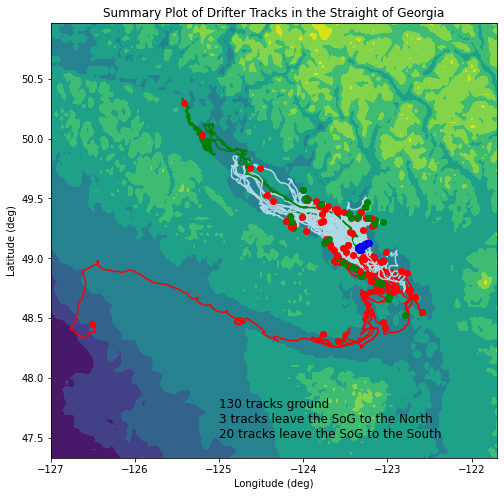

In [11]:
# Do the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(lons_zoomed, lats_zoomed, bath_zoomed)  # , cmap="binary")
for dr in drifters:
    # Tracks that exit the northern Strait (i.e. with end point west of 125.19◦W, north of 50.0◦N) should be GREEN
    if dr["lons"][-1] < -125.19 and dr["lats"][-1] > 50.0:
        ax.plot(dr["lons"], dr["lats"], color="green", label="exit north")
        north_count += 1

    # Tracks that leave the southern Strait (roughly, with end points south of about 48.78◦N latitude, but note that
    # one track that completely leaves the Strait this way ends up north of this latitude and you should account for
    # this) should be RED.
    elif dr["lats"][-1] < 48.78:
        ax.plot(dr["lons"], dr["lats"], color="red", label="exit south")
        south_count += 1

    # Tracks that end within the Strait of Georgia should be LIGHT BLUE.
    else:
        ax.plot(dr["lons"], dr["lats"], color="lightblue", label="SoG")
        sog_count += 1

    # Label the track starting points with dark blue markers
    # (these should all be near the mouth of the Fraser River).
    ax.scatter(
        dr["lons"][0],
        dr["lats"][0],
        color="blue",
        marker="o",
        label="starting point",
        zorder=3,
    )

    # Label track end points at time of first grounding (if they ground) with green markers.
    # Label track end points if the drifter never grounds with red markers.
    if dr["first_ground_date"] == dr["enddate"]:  # never grounds
        ax.scatter(
            dr["lons"][-1],
            dr["lats"][-1],
            color="red",
            marker="o",
            label="ends at sea",
            zorder=3,
        )
    else:
        ax.scatter(
            dr["lons"][-1],
            dr["lats"][-1],
            color="green",
            marker="o",
            label="ends on land",
            zorder=3,
        )

#ax.legend() # generates 153 * 6 legend entries. debug!
text = f"{sog_count} tracks ground\n{north_count} tracks leave the SoG to the \
North\n{south_count} tracks leave the SoG to the South"
ax.annotate(text, (-125,47.5), fontsize="large")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.set_title("Summary Plot of Drifter Tracks in the Straight of Georgia");

## Part 2: Statistics

Now we want to get some summary statistics.
1. First, make a histogram plot showing the time to grounding, for all drifters that ground. Calculate the mean
   and standard deviation of this time, and add this to the plot.

2. Second, plot the drifter latitude (a proxy for the distance up-Strait or down-Strait of the deployment location)
   as a function of time. Use the same line colours and end point markers for grounded and at-Sea end points
   that you used in Part 1.

    Now, add a thick line that gives the *median* drifter latitude, every half-day, from the deployment time to
    15 days after deployment. That is, at 0.5 days after deployment, find the latitude of all drifters still afloat and
    alive, and take the median. Repeat for 1 day after deployment, 1.5 days after, and so on.
    Also, find the MEDIAN ABSOLUTE DEVIATION (or MAD, see mad to calculate this) of the latitudes, i.e.
    
    $$
    MAD(X) ≡median(|X −median(X)|)\tag{1}
    $$
    
    and plot the median $±MAD$ as well.
    Note that the median and the MAD are somewhat similar to the mean and standard deviation, but are less sensitive to outliers.
    
3. Finally, answer the questions

   (a) Are the drifters moving seaward (on average)?
   
   (b) How long does it take for a drifter to move from the Fraser River to the Pacific?

In [12]:
drifters[0]["lifetime"]

datetime.timedelta(days=14, seconds=34429, microseconds=999993)